In [5]:
import pandas as pd

# List of column headers you want to select
selected_columns = ['x', 'y']  # Replace these with actual column headers

# Assuming 'test.txt' is a comma-separated values (CSV) file
data = pd.read_csv('test.txt', usecols=selected_columns)

# Now `data` contains only the selected columns from 'test.txt'
print(data)

    x  y
0  21  2
1   2  4
2   3  6
3   4  8


C:\Users\TXB909\AppData\Local\Temp\ipykernel_10104\1157217972.py:15: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(custom_function, x_data, y_data)


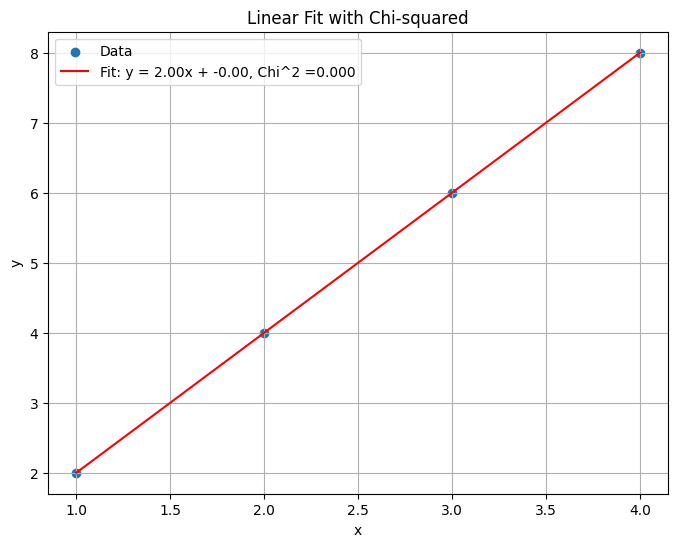

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit

# Define the function you want to plot
def custom_function(x, m, c):
    return m * x + c

# Use the data loaded from the previous step
x_data = data['x'].values  # Replace 'x_column' with the actual column name for x
y_data = data['y'].values  # Replace 'y_column' with the actual column name for y

# Perform the chi-squared fit
popt, pcov = curve_fit(custom_function, x_data, y_data)

# Optimal values for m and c
m_optimal, c_optimal = popt

#calculate chi^2
residuals = y_data - custom_function(x_data, *popt)
chi_squared = np.sum(residuals**2)
# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(x_data, y_data, label='Data')

# Plot the fitted function
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = custom_function(x_fit, m_optimal, c_optimal)
plt.plot(x_fit, y_fit, color='red', label=f'Fit: y = {m_optimal:.2f}x + {c_optimal:.2f}, Chi^2 ={chi_squared:.3f}')

# Display function and fit parameters in the graph
#plt.text(0.05, 0.95, f'Fit: y = {m_optimal:.2f}x + {c_optimal:.2f}, Chi^2 ={chi_squared:.3f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Fit with Chi-squared')
plt.legend()
plt.grid(True)
plt.show()